In [1]:
#imports
import os
import pandas as pd
import numpy as np

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt

#plot a confusion matrix
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Reds):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar(fraction=0.05)
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#load the dataset
path = "."

filename_read = os.path.join(path, "heart.csv")
df = pd.read_csv(filename_read)
df - df.reindex(np.random.permutation(df.index))

#columns to plot on the confusion matrix
df.columns = ['age', 'sex',	'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope',	'ca', 'thal', 'target']
cols = ['age', 'sex']

#Encode the feature values which are strings to integers
for label in df.columns:
    df[label] = LabelEncoder().fit(df[label]).transform(df[label])

print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   29    1   3        31    64    1        0       49      0       22      0   
1    3    1   2        22    80    0        1       84      0       32      0   
2    7    0   1        22    35    0        0       71      0       14      2   
3   22    1   1        14    67    0        1       76      0        8      2   
4   23    0   0        14   145    0        1       62      1        6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [2]:
print("Number of patients with heart disease: " + str(len(df[df.target == 1])))
print("Number of patients without heart disease: " + str(len(df[df.target == 0])))
print("Number of male patients: " + str(len(df[df.sex == 1])))
print("Number of female patients: " + str(len(df[df.sex == 0])))

Number of patients with heart disease: 165
Number of patients without heart disease: 138
Number of male patients: 207
Number of female patients: 96


Text(0, 0.5, 'Maximum heart rate')

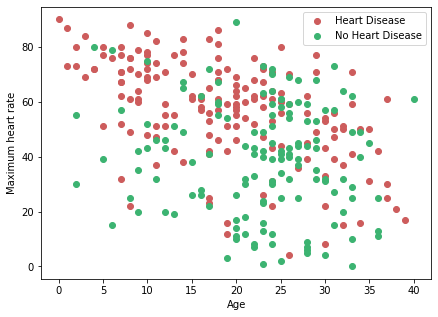

In [3]:
plt.figure(figsize=(7, 5))
plt.scatter(df.age[df.target==1], df.thalach[df.target==1], c="indianred")
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], c="mediumseagreen")
plt.legend(["Heart Disease", "No Heart Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum heart rate")

In [4]:
# Create our X and y data    
result = []
for x in df.columns:
    if x != 'target':
        result.append(x)

X = df[result].values
y = df['target'].values

#split the dataset
X_train, X_test, y_train, y_test = train_test_split(    
    X, y, test_size=0.2) 

#build a knn model
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train, y_train) 

#Instantiate the model with 10 trees and entropy as splitting criteria
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

#make predictions
y_pred_knn = knn.predict(X_test)
y_pred_rf = rf.predict(X_test)

#print results
print('kNN Accuracy: %.3f' % accuracy_score(y_test, y_pred_knn))
print('Random Forest Accuracy: %.3f' % accuracy_score(y_test, y_pred_rf))

kNN Accuracy: 0.672
Random Forest Accuracy: 0.754


Confusion matrix, without normalization
[[21 10]
 [10 20]]
Normalized confusion matrix
[[0.68 0.32]
 [0.33 0.67]]


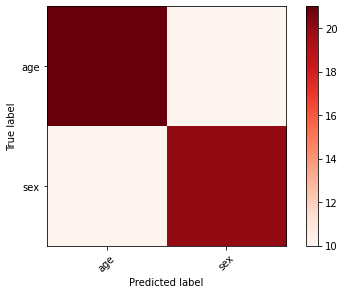

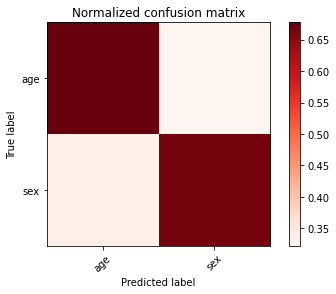

In [5]:
#print confusion matrix numerically, using library method
cm = confusion_matrix(y_test, y_pred_knn)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, cols, title='')

#graphical plots of confusion matrix using method above
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, cols, title='Normalized confusion matrix')
plt.show()

In [6]:
#build a new data frame with three columns, the actual values of the test data, 
#and the predictions of the model
df_compare = pd.DataFrame({'Actual': y_test, 'Predicted (kNN)': y_pred_knn, 'Predicted (RF)': y_pred_rf})
df_head = df_compare.head(20)
print(df_head)

    Actual  Predicted (kNN)  Predicted (RF)
0        0                1               0
1        1                1               1
2        0                0               0
3        0                0               0
4        0                0               0
5        1                1               1
6        1                0               0
7        1                1               1
8        0                0               0
9        0                0               0
10       0                0               0
11       1                1               1
12       0                1               1
13       0                1               1
14       1                1               1
15       1                1               1
16       1                1               1
17       1                0               0
18       1                0               0
19       1                0               0
